In [1]:
import pandas as pd
import numpy as np


In [2]:
pleiades_df = pd.read_csv(r'data/derived/Pleiades_df.csv')


In [3]:
pleiades_df.head()

,id,Place_Type,long,lat,Start_Date,End_Date,Coords_List,Title
0,48210385,['settlement'],13.411984,42.082885,640.0,1453.0,"[13.4119837, 42.082885]",Borgo Medievale
1,48210386,['temple-2'],11.628384,42.419709,-750.0,300.0,"[[11.6285463, 42.4193742], [11.62797, 42.41948...",Tempio Grande at Vulci
2,265876,['settlement'],-3.606772,39.460299,-330.0,640.0,"[-3.606772, 39.460299]",Consabura/Consabrum
3,265877,"['region', 'label']",-0.879814,38.428230,-330.0,300.0,"[[[-1.103416604957735, 38.0622869616915], [-1....",Contestania (region)
4,265878,['mine-2'],-2.403309,37.241792,-330.0,300.0,"[-2.403309, 37.241792]",Cueva de la Paloma


In [10]:
roman_df = pleiades_df[pleiades_df['Title'].str.lower().str.contains('roman ')]
pre_1000_df = pleiades_df[pleiades_df['Start_Date']<1000.0]

roman_pre_1000_df = pd.merge(roman_df, pre_1000_df)
roman_pre_1000_df.head()


,id,Place_Type,long,lat,Start_Date,End_Date,Coords_List,Title
0,265896,['villa'],-3.957694,36.726647,-30.0,300.0,"[[-3.9575079, 36.72682], [-3.9574597, 36.72669...",Roman Villa at El Faro (Torrox)
1,267276,['bridge'],-4.271617,37.987193,-30.0,300.0,"[[-4.2718771, 37.9872355], [-4.2718501, 37.987...",Villa del Río Roman Bridge
2,267284,['bridge'],-2.803149,38.355426,-30.0,640.0,"[[-2.8032447, 38.3553247], [-2.8030536, 38.355...",Puente de Génave Roman Bridge
3,268784,['dam'],-4.060724,39.660559,-30.0,300.0,"[-4.0607239, 39.6605587]",Alcantarilla Roman Dam
4,295349,['fortified-settlement'],4.116589,36.367032,-30.0,300.0,"[4.116589, 36.367032]",Tachachit Roman Site


In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [11]:

# Sample coordinate data
lons = roman_pre_1000_df['long']
lats = roman_pre_1000_df['lat']
start_dates = roman_pre_1000_df['Start_Date']
truncated_start_dates = [max(value, -4000) for value in start_dates]



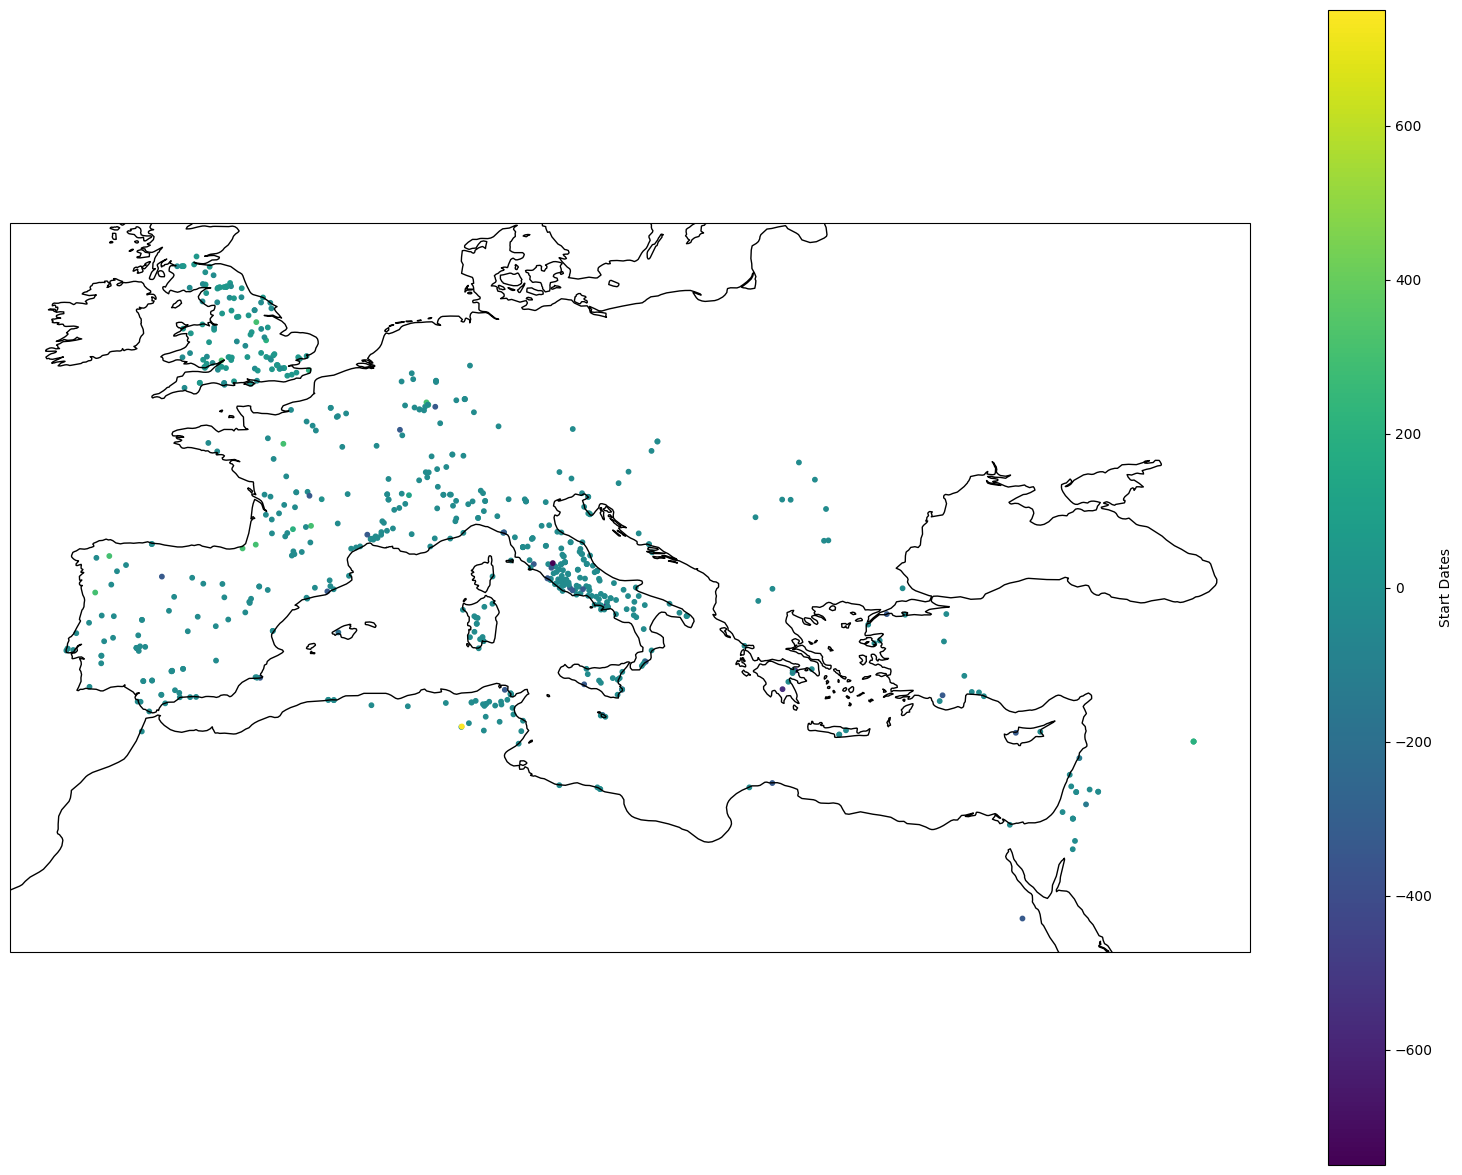

In [12]:

# Create a new figure with a Mercator projection
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()

# Plot the coordinates on the map with color gradient
sc = ax.scatter(lons, lats, c=truncated_start_dates, cmap='viridis', s=10, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, label='Start Dates')

# Show the plot
plt.show()